# Author : s.sivaranjani

GRIP @ The Sparks Foundation

Task 1 : Prediction using Supervised Machine Learning

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  


  steps:
    
   step 1 - Importing the dataset
   step 2 - Visualizing the dataset
   step 3 - Data preparation
   step 4 - Trainning the algorithm
   step 5 - Visualizing the model
   step 6 - Making predictions
   Step 7 - Comparing Actual result to the Predicted Model result
   step 8 - Evaluating the model

# Step 1 - Importing the dataset

In [1]:
# Importing the required libraries

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
# Reading data from remote link

url = r"https://raw.githubuserconternt.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data import successfully.")
df.head(10)

Data import successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2 - Input data Visualization

In this we will plot the dataset to check whether we can observe any relation between the two variables or not

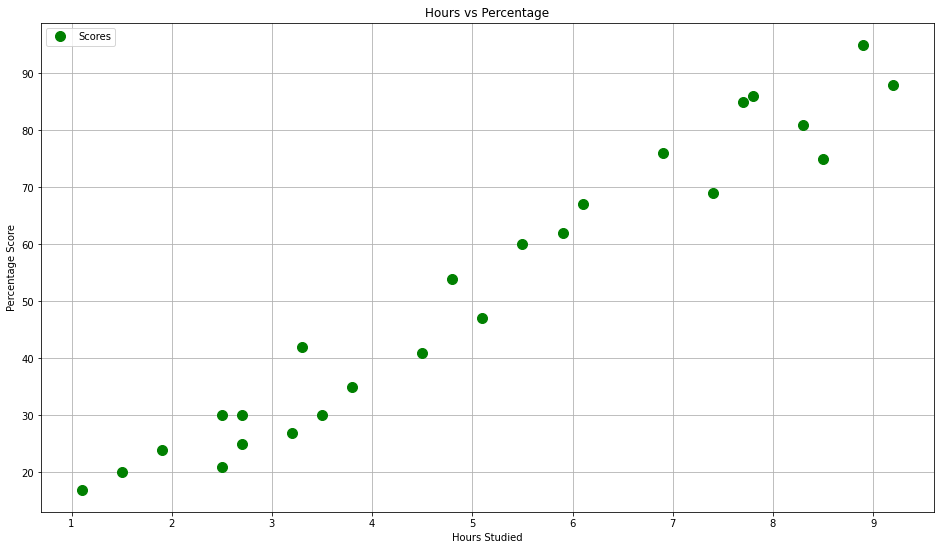

In [7]:
# Plotting the distribution of scores
# Plotting the dataset

plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='o', color='green', markersize=10)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

# Step 3 - Data Preprocessing

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values  

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

# Step 4 - Model Training

Splitting the data into training and testing sets, and training the algorithm. 

We have splited our data into training and testing sets, and now we will train our Model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
model = LinearRegression()  
model.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


# Step 5 - visualizing the model

Plotting the Line of regression Now since our model is trained now, its the time to visualize the best-fit line of regression.

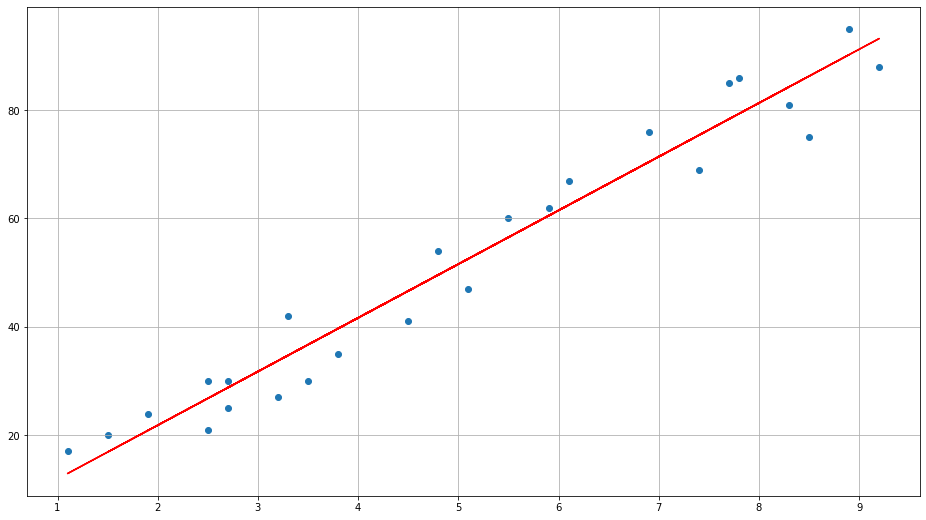

In [12]:
# Plotting the regression line

line = model.coef_*X+ model.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.grid()
plt.show()

# Step 6 - Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [14]:
# Testing data

print(X_test)
# Model Prediction 

y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 7 - Comparing Actual result to the Predicted Model result

In [24]:
# Comparing Actual vs Predicted

df = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [18]:
#Estimating training and test score

print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


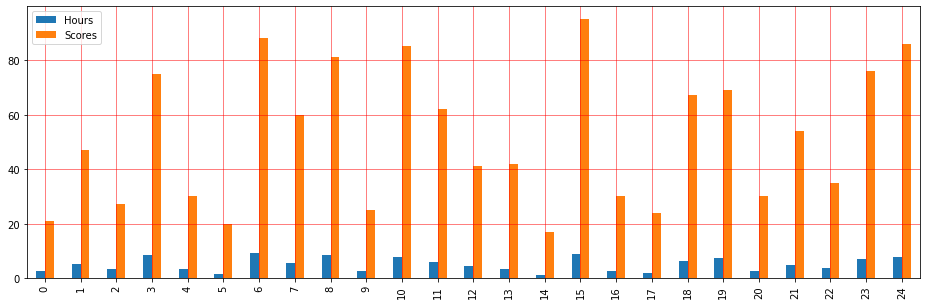

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [21]:
# Testing the model with our own data

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [22]:
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# Step 8 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


In [ ]:
# R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

# Conclusion
I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

#                             Thank You